## Setup

Seaborn sits on top of MatPlotLib and makes several assumptions about what you're doing in matplotlib. This makes visualizations in fewer lines of code.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline
%reload_ext autoreload

## Import Data

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [3]:
crash_df=sns.load_dataset('car_crashes')

crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


# Distribution Plots

## Univariate Distribution

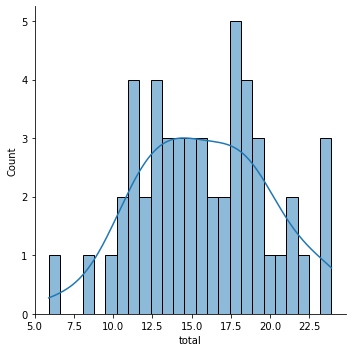

In [4]:
# Univariate Distributions 
sns.displot(crash_df['total'], kde=True, bins=25)

## Joint Plot

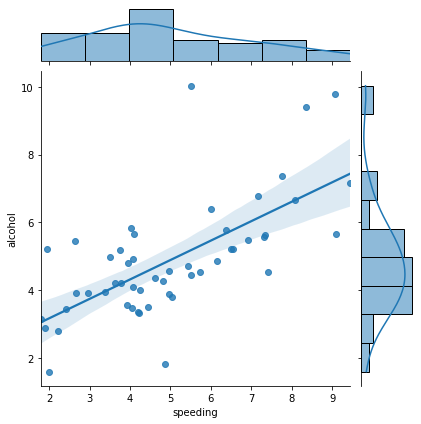

In [5]:
# joint distribution
sns.jointplot(x='speeding',y='alcohol', data=crash_df,
             kind='reg')

## KDE Plot

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

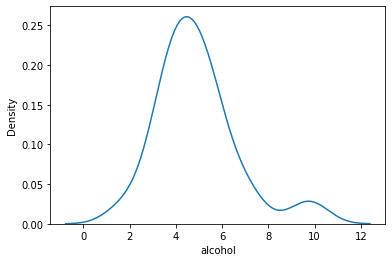

In [6]:
sns.kdeplot(crash_df['alcohol'])

## Pair Plot

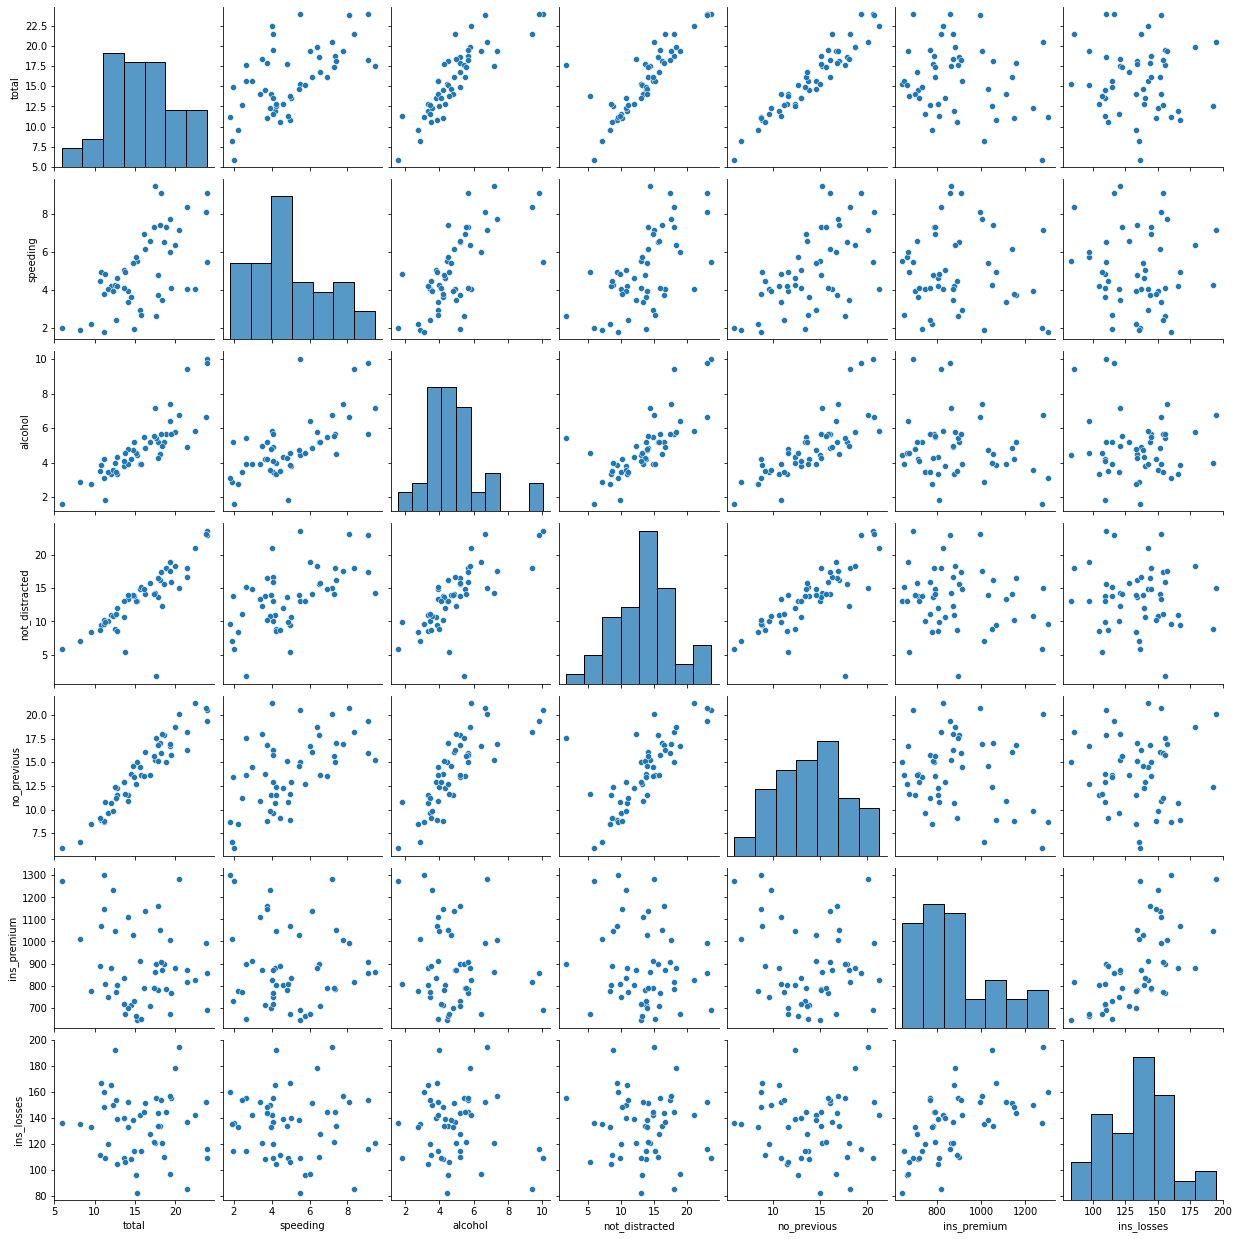

In [7]:
# correlogram of all numerical datapoints
sns.pairplot(crash_df)

c:\users\gunna\documents\my_code\data_science_notes\env\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\gunna\documents\my_code\data_science_notes\env\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\gunna\documents\my_code\data_science_notes\env\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


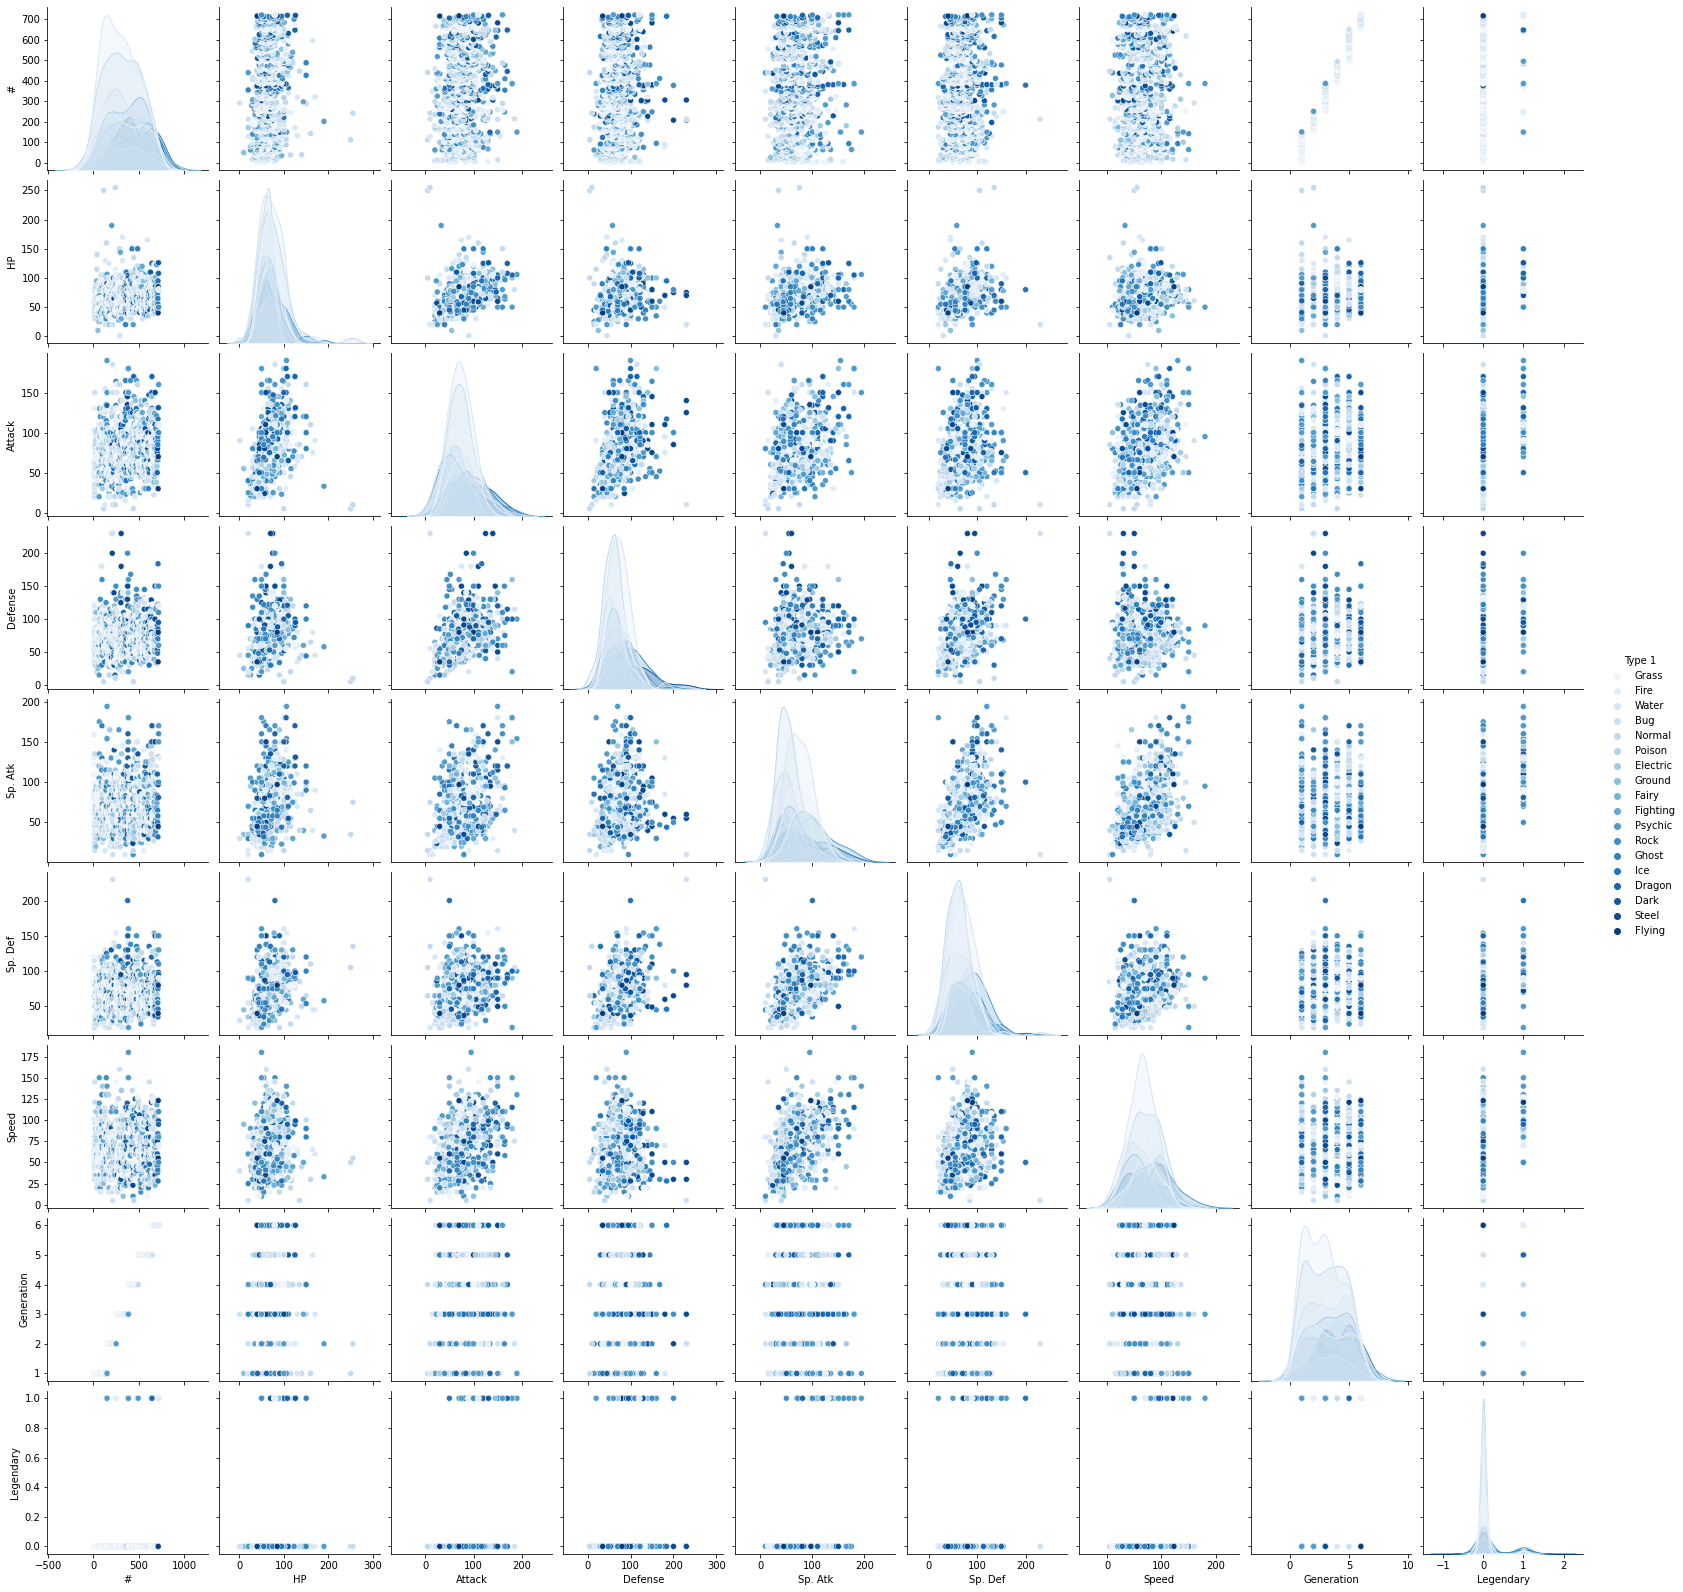

In [9]:
pokemon_df = pd.read_csv('./data/pokemon_data.csv')

#breaking out datapoint colors for a categorical variable
sns.pairplot(pokemon_df, hue='Type 1', palette='Blues')

## Styling

<Figure size 576x288 with 0 Axes>

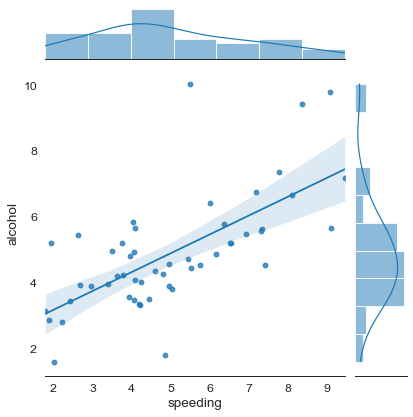

In [10]:
# setting style
sns.set_style('white')
#styles include white, whitegrid, dark, and darkgrid

# changing size
plt.figure(figsize=(8,4))

# changing fonts
sns.set_context('paper', font_scale=1.4)
#fonts are paper, talk, and poster

sns.jointplot(x='speeding', y='alcohol', data=crash_df,
             kind='reg')

#removing axis
sns.despine(left=True)

# Categorical Plotting 

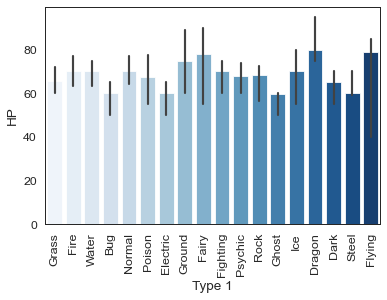

In [11]:
#Default here is mean for the estimator 
sns.barplot(x='Type 1', y='HP', data=pokemon_df,
           estimator=np.median, palette='Blues')

#rotating labels
plt.xticks(rotation=90)
print('')

## Count Plot

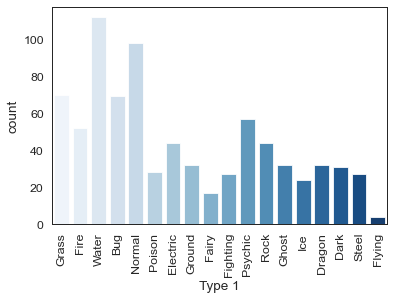

In [12]:
sns.countplot(x='Type 1', data=pokemon_df, palette='Blues')
plt.xticks(rotation=90)
print('')

## Box Plot

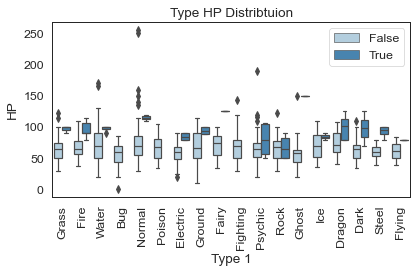

In [13]:
sns.boxplot(x='Type 1',y='HP', hue='Legendary',
            data=pokemon_df,
           palette='Blues')

plt.xticks(rotation=90)
plt.title('Type HP Distribtuion')
plt.legend(loc=0)
plt.tight_layout()

## Violin Plot

<AxesSubplot:xlabel='Generation', ylabel='HP'>

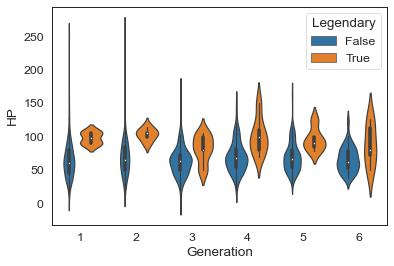

In [14]:
# Uses KDE estimation of the distribution
sns.violinplot(x='Generation', y='HP', hue='Legendary',
              data=pokemon_df)

## Strip Plots

<AxesSubplot:xlabel='Generation', ylabel='Attack'>

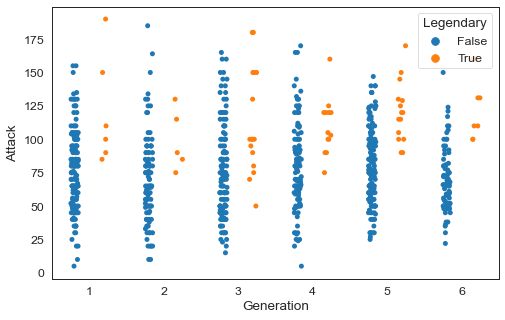

In [15]:
plt.figure(figsize=(8,5))

sns.stripplot(x='Generation', y='Attack', 
              hue='Legendary',
              jitter=True, #spreads out points
              dodge=True, # breaks out Hue
              data=pokemon_df)

## Swarm Plot

c:\users\gunna\documents\my_code\data_science_notes\env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\gunna\documents\my_code\data_science_notes\env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\gunna\documents\my_code\data_science_notes\env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\gunna\documents\my_code\data_science_notes\env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

<AxesSubplot:xlabel='Generation', ylabel='Defense'>

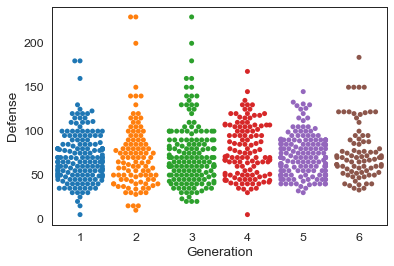

In [16]:
#Effectively recreates a violin plot
#sns.violinplot(x='Generation',y='Defense', data=pokemon_df)
sns.swarmplot(x='Generation',y='Defense', data=pokemon_df)
#Getting a warning because I have too many points 

## Palettes

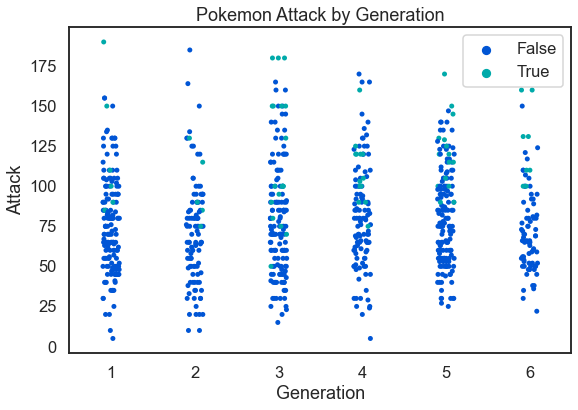

In [17]:
plt.figure(figsize=(9,6))
sns.set_style('white')
sns.set_context('talk')
sns.stripplot(x='Generation', y='Attack',
             data=pokemon_df,
             hue='Legendary',
             palette='winter')

plt.legend(loc=1)
plt.title('Pokemon Attack by Generation')
print('')

# Matrix Plots

## Heatmaps

<AxesSubplot:>

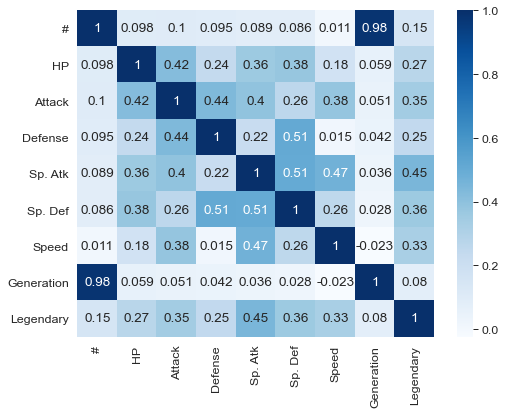

In [18]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)

#creating a correlation matrix
poke_mx=pokemon_df.corr()

#heat map
sns.heatmap(poke_mx, annot=True, cmap='Blues')

<AxesSubplot:xlabel='Type 2', ylabel='Type 1'>

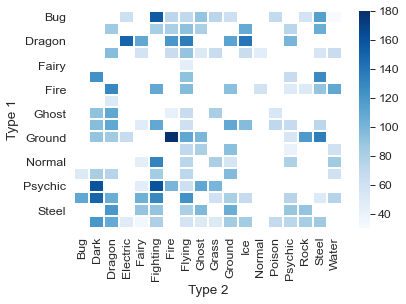

In [19]:
type_granular=pokemon_df.groupby(['Type 1', 'Type 2']).agg(
    mean_attack=pd.NamedAgg(column='Attack', aggfunc='mean')
)

type_pivot=pd.pivot_table(type_granular, values='mean_attack',
                         index='Type 1', columns='Type 2',
                         aggfunc='sum')

sns.heatmap(type_pivot, cmap='Blues',linecolor='white',
           linewidth=1)

## Cluster Maps

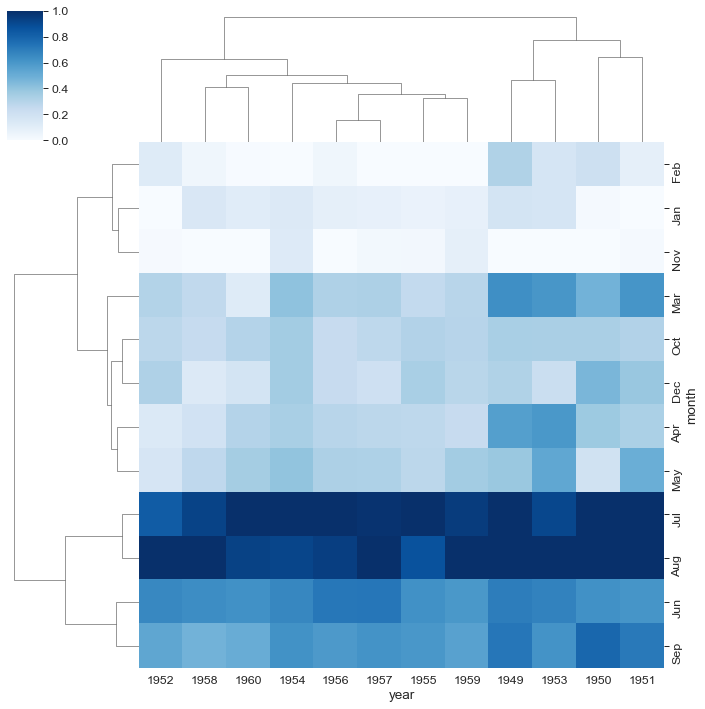

In [20]:
flights= sns.load_dataset('flights')

flights_pvt=pd.pivot_table(flights, values='passengers',
                          index='month', columns='year',
                          aggfunc='sum')

#Effectively attempting to cluster like data points 
#Standard scale will bet everything between 0 and 1
sns.clustermap(flights_pvt, standard_scale=1, cmap='Blues')

## Pair Grid

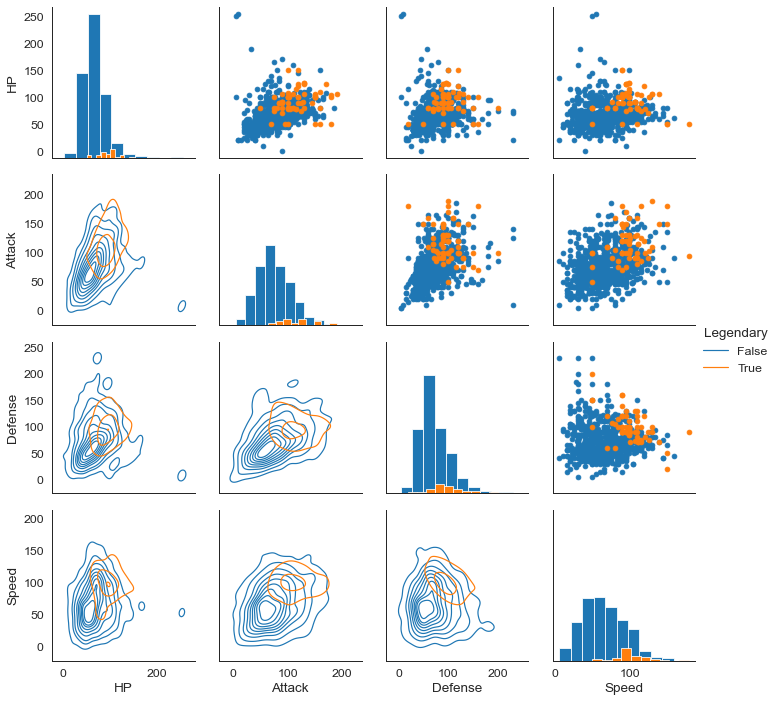

In [21]:
#like correlograms but with scatterplots and more control
#Can control how things are presented and which data points are shown
poke_grid=sns.PairGrid(pokemon_df, hue='Legendary',
                      x_vars=['HP','Attack','Defense','Speed'],
                      y_vars=['HP','Attack','Defense','Speed'])

#Can also specify which plots are used where
#poke_grid.map(plt.scatter)
poke_grid.map_diag(plt.hist)
#poke_grid.map_offdiag(plt.scatter)
poke_grid.map_upper(plt.scatter)
poke_grid.map_lower(sns.kdeplot)

poke_grid.add_legend()


## Facet Grid

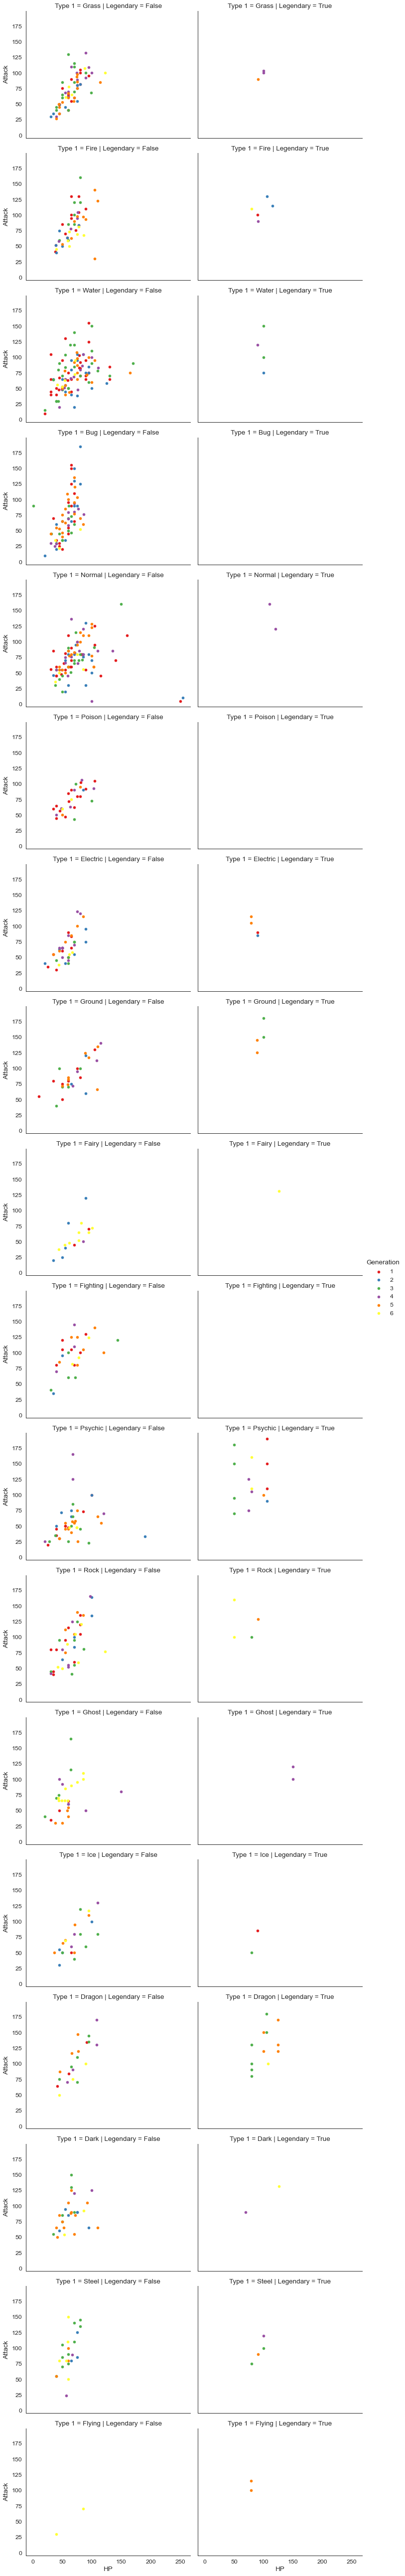

In [22]:
# Allows for multpile plots by attributes

#fire_water=pokemon_df.loc[(pokemon_df['Type 1']=='Fire')|(pokemon_df['Type 1']=='Water')]

poke_fg=sns.FacetGrid(pokemon_df, col='Legendary', 
                      row='Type 1', height=4,
                     aspect=1.3, # aspect is width
                      hue='Generation', palette='Set1')

poke_fg.map(plt.scatter,'HP','Attack')
poke_fg.add_legend()


## Regression Plots 

<Figure size 576x432 with 0 Axes>

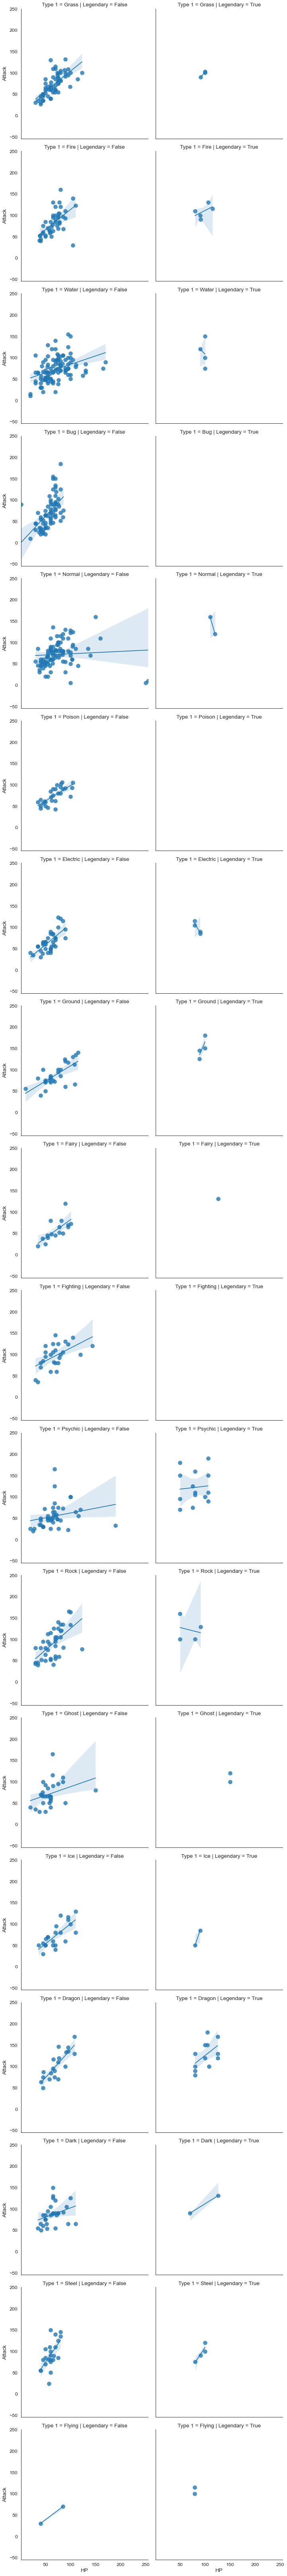

In [23]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# creates a linear regression
sns.lmplot(x='HP', y='Attack', data=pokemon_df, 
           scatter_kws={'s':100,
                        'linewidth':.5},
          col='Legendary', row='Type 1')